In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif

In [ ]:
thyroid_data = pd.read_csv('https://raw.githubusercontent.com/Christo2810/ds-and-ml/refs/heads/main/balanced_thyroid_dataset%20(1).csv')
thyroid_data.head()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
0,41,0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,0
1,23,0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.97,0,106.0,0
2,46,1,0,0,0,0,0,0,0,0,...,0.98,0,1.9,1,109.0,1,0.91,1,120.0,0
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.97,0,106.0,0
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,0


In [ ]:
print(thyroid_data.columns)

Index(['Age', 'FTI', 'FTI Measured', 'Goitre', 'Hypopituitary',
       'I131 Treatment', 'Lithium', 'On Antithyroid Medication',
       'On Thyroxine', 'Pregnant', 'Psych', 'Query 1', 'Query 2',
       'Query on Thyroxine', '3', 'T3', 'T3 Measured', 'T4U', 'T4U Measured',
       'TSH', 'TSH Measured', 'TT4', 'TT4 Measured', 'Thyroid Surgery',
       'Tumor', 'Category'],
      dtype='object')


In [ ]:
print(thyroid_data['Tumor'])

0        109.000000
1        106.000000
2        120.000000
3        106.000000
4         70.000000
            ...    
11007    182.618245
11008     94.626365
11009     99.660537
11010     96.408907
11011     17.001075
Name: Tumor, Length: 11012, dtype: float64


In [ ]:
thyroid_data.info()
print(thyroid_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11012 entries, 0 to 11011
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        11012 non-null  int64  
 1   FTI                        11012 non-null  int64  
 2   FTI Measured               11012 non-null  int64  
 3   Goitre                     11012 non-null  int64  
 4   Hypopituitary              11012 non-null  int64  
 5   I131 Treatment             11012 non-null  int64  
 6   Lithium                    11012 non-null  int64  
 7   On Antithyroid Medication  11012 non-null  int64  
 8   On Thyroxine               11012 non-null  int64  
 9   Pregnant                   11012 non-null  int64  
 10  Psych                      11012 non-null  int64  
 11  Query 1                    11012 non-null  int64  
 12  Query 2                    11012 non-null  int64  
 13  Query on Thyroxine         11012 non-null  int

In [ ]:
# Step 2: Data Preprocessing
# Check for missing values
print(thyroid_data.isnull().sum())

Age                          0
FTI                          0
FTI Measured                 0
Goitre                       0
Hypopituitary                0
I131 Treatment               0
Lithium                      0
On Antithyroid Medication    0
On Thyroxine                 0
Pregnant                     0
Psych                        0
Query 1                      0
Query 2                      0
Query on Thyroxine           0
3                            0
T3                           0
T3 Measured                  0
T4U                          0
T4U Measured                 0
TSH                          0
TSH Measured                 0
TT4                          0
TT4 Measured                 0
Thyroid Surgery              0
Tumor                        0
Category                     0
dtype: int64


In [ ]:
x = thyroid_data.drop(columns=['Category'], axis=1)
y = thyroid_data['Category']


In [ ]:
# Normalize 'TSH Measured' and 'Tumor' features
normalize_attributes = ['TSH Measured', 'Tumor']
x[normalize_attributes] = StandardScaler().fit_transform(x[normalize_attributes])

In [ ]:
# Step 2: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Feature selection using mutual information
mutual_info = mutual_info_classif(x_train, y_train)
feature_scores = pd.DataFrame({'Feature': x_train.columns, 'Mutual Info': mutual_info})
feature_scores = feature_scores.sort_values(by='Mutual Info', ascending=False)

In [ ]:
# Select top 10 features based on mutual information
selected_features = feature_scores['Feature'].head(10).tolist()
print("Selected Features:", selected_features)

Selected Features: ['T3 Measured', 'T4U Measured', 'TSH Measured', 'Tumor', 'TT4 Measured', 'Age', 'FTI', 'T3', 'T4U', 'FTI Measured']


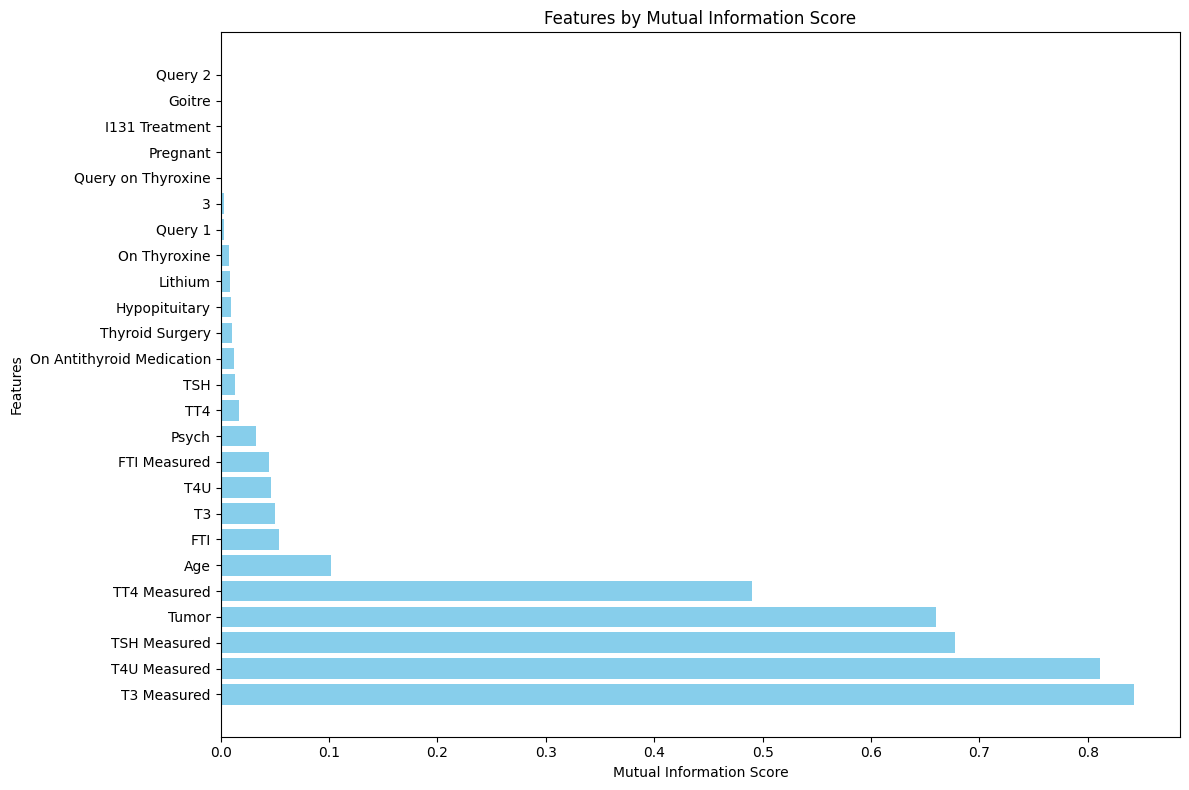

In [ ]:
# Visualize feature importance based on mutual information scores
plt.figure(figsize=(12, 8))
plt.barh(feature_scores['Feature'], feature_scores['Mutual Info'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Features by Mutual Information Score')
plt.tight_layout()
plt.show()

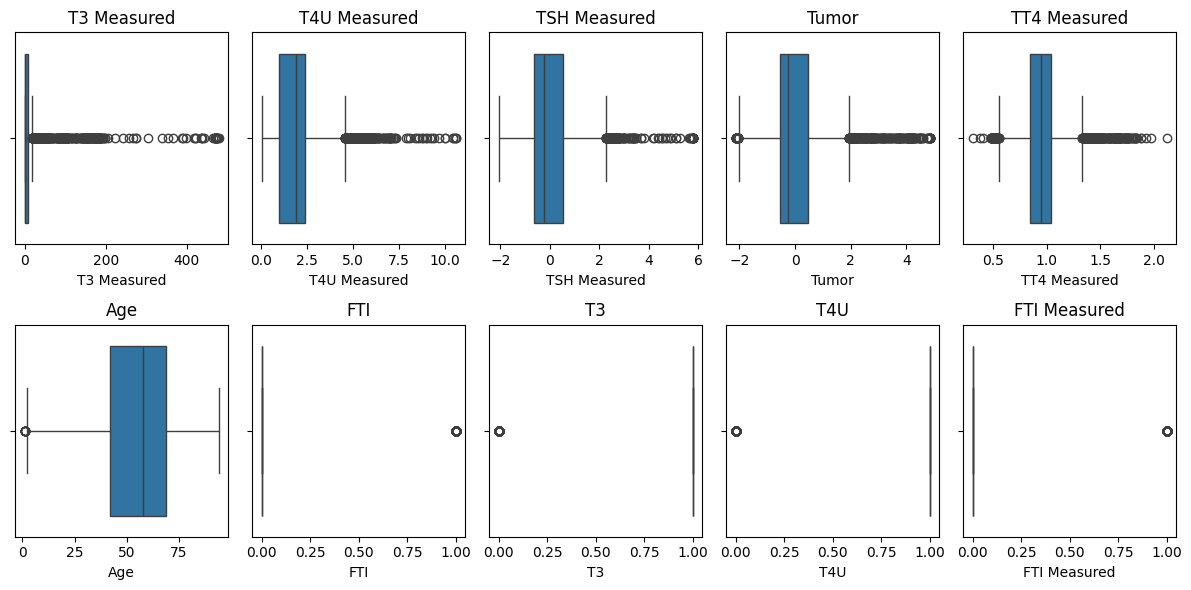

In [ ]:
#Outlier Detection (boxplot visualization)
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)  # Adjusted to fit 10 features
    sns.boxplot(x=x_train[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

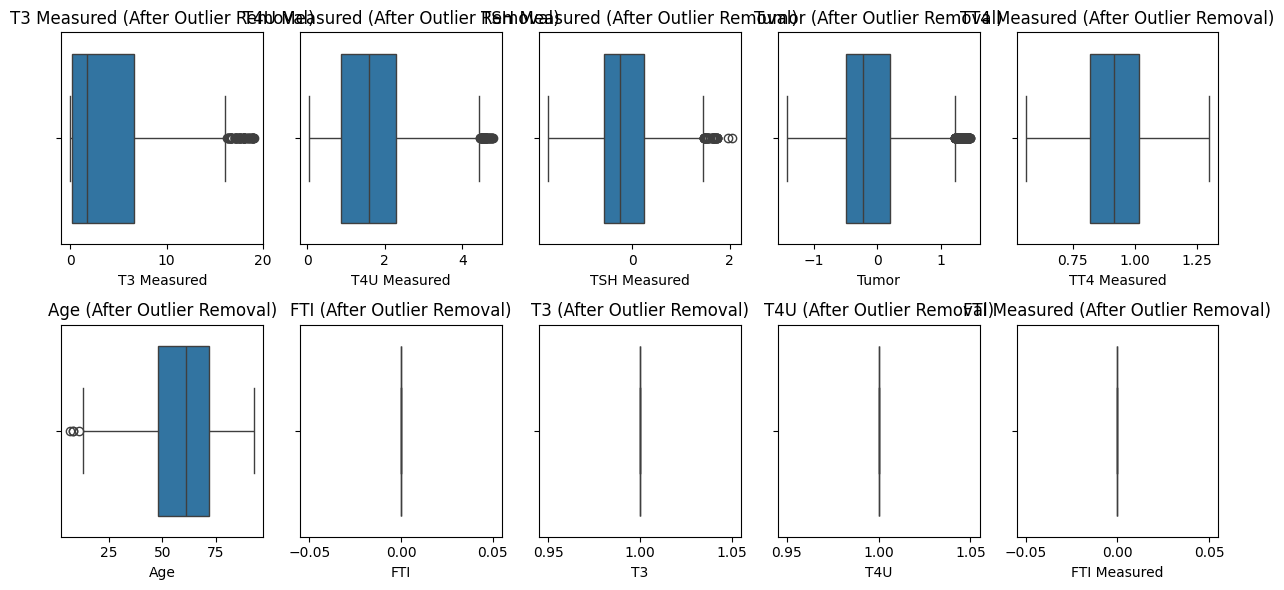

In [ ]:
# Step 3: Outlier Removal using IQR method
x_train_no_outliers = x_train[selected_features].copy()

# Remove outliers and create a mask for y_train
for feature in selected_features:
    Q1 = x_train_no_outliers[feature].quantile(0.25)
    Q3 = x_train_no_outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a mask to filter out outliers
    mask = (x_train_no_outliers[feature] >= lower_bound) & (x_train_no_outliers[feature] <= upper_bound)
    x_train_no_outliers = x_train_no_outliers[mask]

# Get remaining indices after filtering
remaining_indices = x_train_no_outliers.index
y_train_no_outliers = y_train.loc[remaining_indices]  # Use the remaining indices to filter y_train

# Visualize the boxplots after outlier removal
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)  # Adjusted to fit 10 features
    sns.boxplot(x=x_train_no_outliers[feature])
    plt.title(f"{feature} (After Outlier Removal)")

plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Train Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()
gbm_model.fit(x_train_no_outliers, y_train_no_outliers)

GradientBoostingClassifier()

In [ ]:
# Step 5: Make predictions
y_pred = gbm_model.predict(x_test[selected_features])

In [ ]:
# Step 6: Check accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8374943259192011
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       551
           1       0.91      0.70      0.79       557
           2       0.89      0.92      0.90       544
           3       0.78      0.93      0.85       551

    accuracy                           0.84      2203
   macro avg       0.84      0.84      0.84      2203
weighted avg       0.84      0.84      0.84      2203



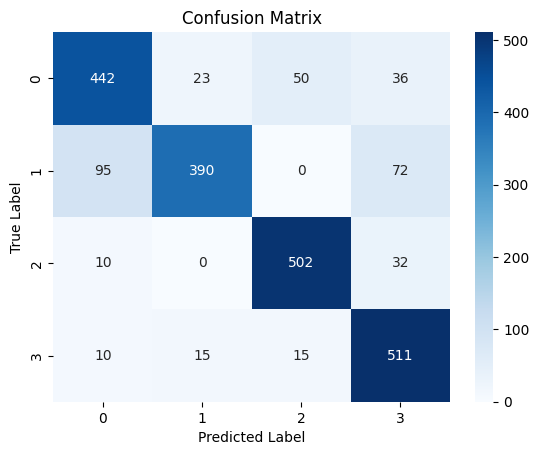

In [ ]:
# Step 7: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#step 8
# Import necessary libraries for widgets
import ipywidgets as widgets
from IPython.display import display

# Initialize input widgets for each selected feature
input_widgets = {feature: widgets.FloatText(description=feature) for feature in selected_features}

# Display the widgets
for widget in input_widgets.values():
    display(widget)

# Create a button for prediction
predict_button = widgets.Button(description="Predict")

# Define the prediction function
def make_prediction(button):
    input_data = pd.DataFrame([{feature: input_widgets[feature].value for feature in selected_features}])
    prediction = gbm_model.predict(input_data)

    # Provide prediction outcome
    if prediction[0] == 0:
        print("The prediction indicates a negative thyroid condition.")
    elif prediction[0] == 1:
        print("The prediction indicates compensated hyperthyroidism.")
    elif prediction[0] == 2:
        print("The prediction indicates compensated hypothyroidism.")
    else:
        print("The prediction indicates goiter.")

# Bind the prediction function to the button click event
predict_button.on_click(make_prediction)

# Display the button
display(predict_button)


FloatText(value=0.0, description='T3 Measured')

FloatText(value=0.0, description='T4U Measured')

FloatText(value=0.0, description='TSH Measured')

FloatText(value=0.0, description='Tumor')

FloatText(value=0.0, description='TT4 Measured')

FloatText(value=0.0, description='Age')

FloatText(value=0.0, description='FTI')

FloatText(value=0.0, description='T3')

FloatText(value=0.0, description='T4U')

FloatText(value=0.0, description='FTI Measured')

Button(description='Predict', style=ButtonStyle())

The prediction indicates a negative thyroid condition.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 3, 4]
}

# Initialize the GridSearchCV object with GradientBoostingClassifier and parameter grid
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [ ]:
# Fit GridSearchCV on training data
grid_search.fit(x_train_no_outliers, y_train_no_outliers)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
